In [165]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn import metrics
import seaborn as sns


In [166]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

In [167]:
loan=pd.read_csv("Finalprocessed_loans_2007.csv")

In [168]:
loan.T

,0,1,2,3,4,5,6,7,8,9,...,38113,38114,38115,38116,38117,38118,38119,38120,38121,38122
loan_amnt,5000.000,2500.000,2400.000,10000.00,5000.000,7000.000,3000.000,5600.000,5375.000,6500.000,...,5000.000,5000.000,5000.000,5000.000,5000.00,2500.000,8500.000,5000.000,5000.000,7500.000
installment,162.870,59.830,84.330,339.31,156.460,170.080,109.430,152.390,121.450,153.450,...,159.770,161.250,164.230,155.380,158.30,78.420,275.380,156.840,155.380,255.430
grade,2.000,3.000,3.000,3.00,1.000,3.000,5.000,6.000,2.000,3.000,...,2.000,2.000,3.000,1.000,2.00,1.000,3.000,1.000,1.000,5.000
emp_length,10.000,0.000,10.000,10.00,3.000,8.000,9.000,4.000,0.000,5.000,...,2.000,4.000,0.000,1.000,5.00,4.000,3.000,0.000,0.000,0.000
annual_inc,24000.000,30000.000,12252.000,49200.00,36000.000,47004.000,48000.000,40000.000,15000.000,72000.000,...,180000.000,48000.000,80000.000,85000.000,75000.00,110000.000,18000.000,100000.000,200000.000,22000.000
loan_status,1.000,0.000,1.000,1.00,1.000,1.000,1.000,0.000,0.000,1.000,...,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.000
dti,27.650,1.000,8.720,20.00,11.200,23.510,5.350,5.550,18.080,16.120,...,11.930,8.030,1.210,0.310,15.55,11.330,6.400,2.300,3.720,14.290
delinq_2yrs,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.00,0.000,1.000,0.000,0.000,1.000
inq_last_6mths,1.000,5.000,2.000,1.00,3.000,1.000,2.000,2.000,0.000,2.000,...,1.000,1.000,3.000,0.000,0.00,0.000,1.000,0.000,0.000,0.000
open_acc,3.000,3.000,2.000,10.00,9.000,7.000,4.000,11.000,2.000,14.000,...,16.000,6.000,15.000,7.000,10.00,13.000,6.000,11.000,17.000,7.000


In [169]:
loan["loan_status"].value_counts()

1    32717
0     5406
Name: loan_status, dtype: int64

In [170]:
loan['loan_status'].value_counts(normalize=True) * 100

1    85.819584
0    14.180416
Name: loan_status, dtype: float64

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [172]:
from sklearn.model_selection import train_test_split
X=loan.drop("loan_status",1)
y=loan["loan_status"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=11)

In [173]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', BernoulliNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=10)))
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('DT',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB',
  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('RF',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='

In [174]:
seed = 4

from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
from sklearn import model_selection

In [175]:
models2 = []

models2.append(('LR', LogisticRegression()))
models2.append(('DT', DecisionTreeClassifier()))
models2.append(('RF', RandomForestClassifier(n_estimators=10)))
models2.append(('KNN', KNeighborsClassifier()))
models2.append(('NB', BernoulliNB()))
#models2.append(('SVM', ))

def evaluation(modelx):
        
        fit = modelx.fit(X_train,y_train)
    
        y_pred= fit.predict(X_test)
    
        accuracy = accuracy_score(y_test,y_pred)
    
        return accuracy
    
    
results2 = []
names2 = []
for name,model in models2:
    a = evaluation(model)
    results2.append(a)
    names2.append(name)
    print('The accuracy of ',name,' is : ',a) 

results3 = []

for i in results2:
    results3.append([i])

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of  LR  is :  0.8563434467080528
The accuracy of  DT  is :  0.758153361895602
The accuracy of  RF  is :  0.8378071172510274
The accuracy of  KNN  is :  0.8397306986097753
The accuracy of  NB  is :  0.8413045379032963


### Accuracy, the proportion of correct classifications among all classifications, is very simple and very "intuitive" measure, yet it may be a poor measure for imbalanced data.

# spot checking

In [176]:
def compare_models(n_splits, random_state, X_train, y_train):  

    models  = []
    models.append(('LR', LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    
    
    ### Evaluate model in turn
    

    names       = []
    
    scores_req  =  ['roc_auc', 'balanced_accuracy']
    
    for i in range(len(scores_req)):
        results     =   []
        scoring     =  scores_req[i]
        
        print(scoring)
        
        for name, model in models:
            kfold      =  KFold(n_splits = n_splits,  random_state = random_state)                
            cv_results =  cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
            results.append(cv_results)
            names.append(name)
            msg       = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print(msg)
        
        ### Box plot algorithm comparison
        
        sub_title = 'Algorithm Comparison using ' + scoring
        

        fig, ax = plt.subplots(1, figsize=(8, 6))
        fig.suptitle(sub_title)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.xticks(rotation = 90)
        plt.show()

In [177]:
def split_target_predictor(dataframe, target_name): 

    import pandas as pd
    
    df                 = pd.DataFrame(dataframe)
    predictor_names    = list(df.columns)
    array              = df.values 
    
    #target_name        = input('Target variable name: ')
    
    predictor_names.remove(target_name)
   
    idx                = [df.columns.get_loc(c) for c in df.columns if c in predictor_names]
    X                  = array[:,idx] 

    
    idy                =  df.columns.get_loc(target_name)
    y                  = array[:,idy] 
    return X, y

In [178]:
def split_train_test(X, y, test_size = 0.3, seed = 123): 
    
    from   sklearn.model_selection  import  train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed) 

    return X_train, X_test, y_train, y_test

In [179]:
X_train, X_test, y_train, y_test = split_train_test(X, y, 0.3, 12345)

roc_auc


C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.634506 (0.011117)
KNN: 0.534132 (0.007489)
CART: 0.537039 (0.010169)
NB: 0.645041 (0.017842)


C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

RF: 0.622637 (0.010755)


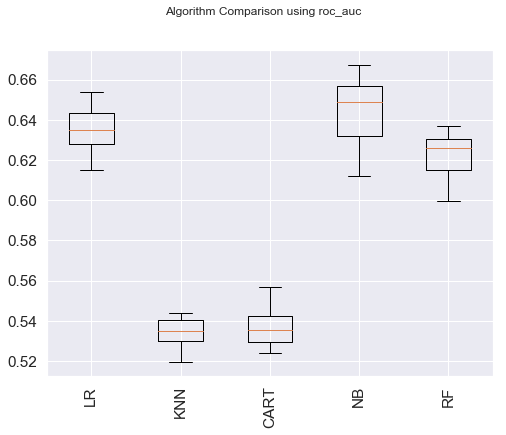

balanced_accuracy


C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.499957 (0.000087)
KNN: 0.503870 (0.005919)
CART: 0.534380 (0.009325)
NB: 0.514502 (0.004177)


C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

RF: 0.523915 (0.007729)


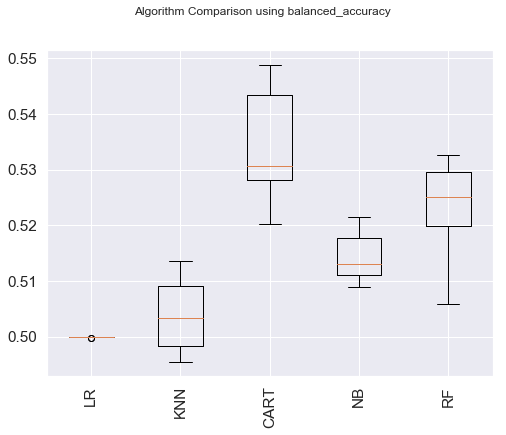

In [180]:


n_splits     = 10
random_state = 123456

compare_models(n_splits, random_state, X_train, y_train)

# Logistic Regression

In [181]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [182]:
y_pred11=logreg.predict(X_test)

In [183]:
y_prob1 = logreg.predict_proba(X_test)[:,1]

In [184]:
y_prob1

array([0.85005262, 0.84045097, 0.87811472, ..., 0.87027284, 0.8838081 ,
       0.90391205])

In [185]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

acc = accuracy_score(y_test, y_pred11)
prec = precision_score(y_test, y_pred11)
rec = recall_score(y_test, y_pred11)
f1 = f1_score(y_test, y_pred11)
print(acc)
print(prec)
print(rec)
print(f1)


0.8595785608114016
0.8595785608114016
1.0
0.9244874929471506


Test data accuracy: 0.8596


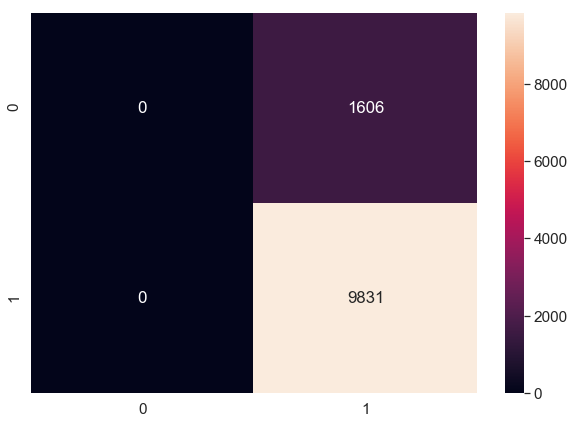

In [186]:
cm11 = confusion_matrix(y_test, y_pred11)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm11, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, y_pred11)))

In [187]:
print(classification_report(y_test, y_pred11))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1606
           1       0.86      1.00      0.92      9831

   micro avg       0.86      0.86      0.86     11437
   macro avg       0.43      0.50      0.46     11437
weighted avg       0.74      0.86      0.79     11437



C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Here we can see that 1 has 0.86 precision and  0 has 0.00 which shows that it has not predicted defaulters correctly.

In [188]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred11)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [189]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred11))

0.8595785608114016
0.8595785608114016


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [190]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred11))

1.0
1.0


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [191]:
print(TN / float(TN + FP))

0.0


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [192]:
print(FP / float(TN + FP))

1.0


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [193]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred11))

0.8595785608114016
0.8595785608114016


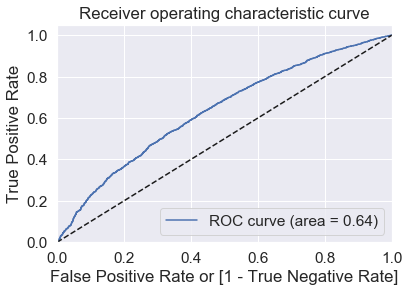

In [194]:

fpr, tpr, thresholds = metrics.roc_curve( y_test, y_prob1,drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_prob1)
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [195]:
def get_youdens_j_cutoff(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

In [196]:
print(get_youdens_j_cutoff(fpr,tpr,thresholds))

0.8662195759500046


In [197]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [198]:
evaluate_threshold(0.5)

Sensitivity: 1.0
Specificity: 0.0


In [199]:
evaluate_threshold(0.8)

Sensitivity: 0.9260502492116773
Specificity: 0.16749688667496887


In [200]:
evaluate_threshold(0.85)

Sensitivity: 0.7279015359576849
Specificity: 0.4570361145703612


In [201]:
evaluate_threshold(0.86)

Sensitivity: 0.6112297833384193
Specificity: 0.5821917808219178


In [202]:
evaluate_threshold(0.9)

Sensitivity: 0.12053707659444614
Specificity: 0.9489414694894147


In [203]:
evaluate_threshold(0.866)

Sensitivity: 0.5267012511443393
Specificity: 0.6674968866749689


### Optimum cut off is 0.863 ,for which the sensitivity is 0.52 and specificity is 0.66.

# Decision tree

In [204]:
from sklearn.tree import DecisionTreeClassifier

In [205]:
dtree = DecisionTreeClassifier()

In [206]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [207]:
predictions = dtree.predict(X_test)

In [208]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.21      0.25      0.23      1606
           1       0.87      0.85      0.86      9831

   micro avg       0.76      0.76      0.76     11437
   macro avg       0.54      0.55      0.54     11437
weighted avg       0.78      0.76      0.77     11437



### Here the precision rate for 1 is 0.87 and 0 is 0.21

# Random Forest

In [209]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [210]:
# Predicting Test Set
y_pred22 = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred22)
prec = precision_score(y_test, y_pred22)
rec = recall_score(y_test, y_pred22)
f1 = f1_score(y_test, y_pred22)
print(acc)
print(prec)
print(rec)
print(f1)


0.8597534318440151
0.8606119049706321
0.9985759332723019
0.9244749976457294


In [211]:
y_prob2 =classifier.predict_proba(X_test)[:,1]

In [212]:
y_prob2

array([0.83, 0.86, 0.89, ..., 0.91, 0.94, 0.94])

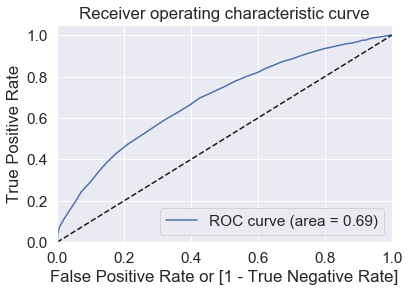

In [213]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_prob2,drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_prob2)
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

Test data accuracy: 0.8598


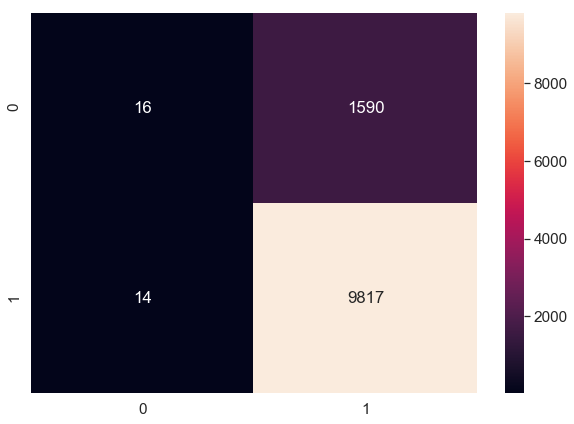

In [214]:
cm1 = confusion_matrix(y_test, y_pred22)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm1, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, y_pred22)))

In [215]:
print(classification_report(y_test, y_pred22))

              precision    recall  f1-score   support

           0       0.53      0.01      0.02      1606
           1       0.86      1.00      0.92      9831

   micro avg       0.86      0.86      0.86     11437
   macro avg       0.70      0.50      0.47     11437
weighted avg       0.81      0.86      0.80     11437



### Here we can see that 1 has 0.86 precision and  0 has 0.53 which is improved from the decision tree model . 

# Cross Validation

In [216]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [217]:
from sklearn.model_selection import cross_val_score

In [218]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.8405455  0.83661159 0.84316811 0.83766063 0.8405455  0.84264359
 0.84286464 0.83967463 0.84072422 0.84203621]


In [219]:
print(scores.mean())

0.8406474622279261


In [220]:
print(scores.std())

0.0020824300840459687


### Cross validation score is 0.84 and Standard deviation is 0.002 hence the values are distributed within the range of 84.

In [221]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

[0.764394173589866, 0.6833142904783039, 0.8203182814788681, 0.788946384454453, 0.8406474622279261, 0.8258795706069687, 0.8496973276810467, 0.8432444554833948, 0.8537892963131043, 0.8498284649189214, 0.855363197621738, 0.8527400884007685, 0.8565959535976516, 0.855415567179046, 0.8573828457658429, 0.8568320088701178, 0.8578024559889791, 0.857015591351104, 0.8576450720463891, 0.8574090649582946, 0.8579073602602177, 0.857671304998583, 0.8580122645350668, 0.857854880599698, 0.8580122645386774, 0.8579073602638283, 0.8580909565045566, 0.857959819281124, 0.858038497487261, 0.8580647235559733]


In [222]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.8580909565045566


Text(0, 0.5, 'Cross-validated accuracy')

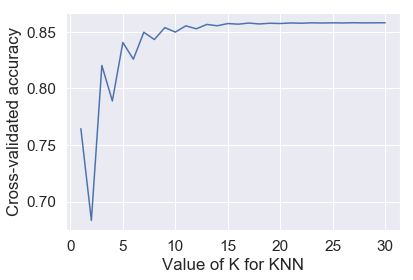

In [223]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

#### we chose the knn value as 10

### comparing the best knn model

In [224]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=10)

# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.8498284649189214


### After applying the optimum knn value score increases from 0.84 0.849

In [225]:
cross_val_score(knn, X, y, cv=10, scoring='roc_auc').mean()

0.5407992214039853

### Area under the curve for cross validation is 0.54

In [226]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.8581696347106936


In [227]:
print(cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean())

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.6366829095160352


### cross validation for logistic regression model is 0.858 and the area under the curve is 0.63

### We can't come to conclusion with accuracy rate ,our model performed poor while seeing the values of precision and f1 score. So we need to balance this imbalanced dataset

# SMOTE

In [228]:
from imblearn.over_sampling import SMOTE

In [229]:
#X=model.drop("loan_status",1)
#y=model["loan_status"]

In [230]:
# Implementing Oversampling for Handling Imbalanced 
ros = SMOTE()
X_res,y_res=ros.fit_sample(X,y)

In [231]:
X_res.shape,y_res.shape

((65434, 38), (65434,))

In [232]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({1: 32717, 0: 5406})
Resampled dataset shape Counter({1: 32717, 0: 32717})


In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=.30,random_state=11)

In [235]:
X_train.shape

(45803, 38)

In [236]:
X_test.shape

(19631, 38)

In [237]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [238]:
y_pred=logreg.predict(X_test)

In [239]:
y_prob12 = logreg.predict_proba(X_test)[:,1]

In [240]:
y_prob12

#2 because probability of predicting as 0 and 1

array([0.62160139, 0.32829367, 0.68989309, ..., 0.59999303, 0.40881075,
       0.43571177])

In [241]:
y_prob12.shape

(19631,)

In [242]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


Test data accuracy: 0.6554


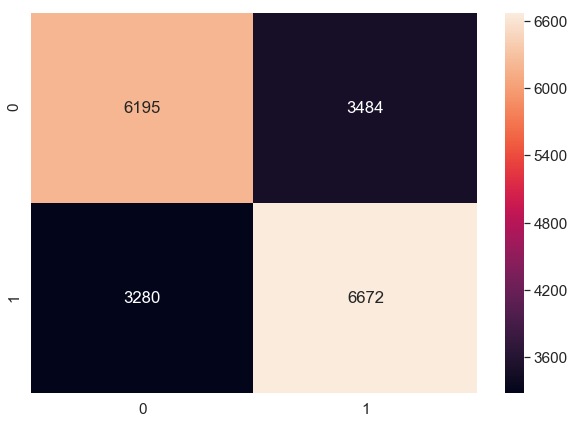

In [243]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, y_pred)))

In [244]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      9679
           1       0.66      0.67      0.66      9952

   micro avg       0.66      0.66      0.66     19631
   macro avg       0.66      0.66      0.66     19631
weighted avg       0.66      0.66      0.66     19631



### This model predicted 1 with 0.65 precision and 0 with 0.65 precision which shows the precision rate improved after over sampling.

In [245]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.655443,0.656952,0.670418,0.663616


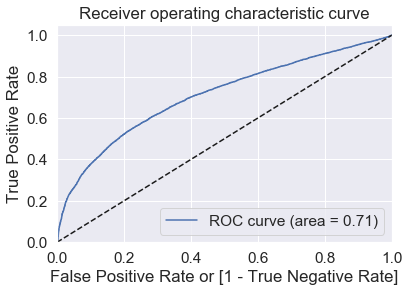

In [246]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_prob12,drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_prob12)
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [247]:
dtree1 = DecisionTreeClassifier()

In [248]:
dtree1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [249]:
predictions1 = dtree.predict(X_test)

In [250]:
from sklearn.metrics import classification_report,confusion_matrix

In [251]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.91      0.49      0.63      9679
           1       0.66      0.95      0.78      9952

   micro avg       0.72      0.72      0.72     19631
   macro avg       0.78      0.72      0.70     19631
weighted avg       0.78      0.72      0.71     19631



Test data accuracy: 0.7222


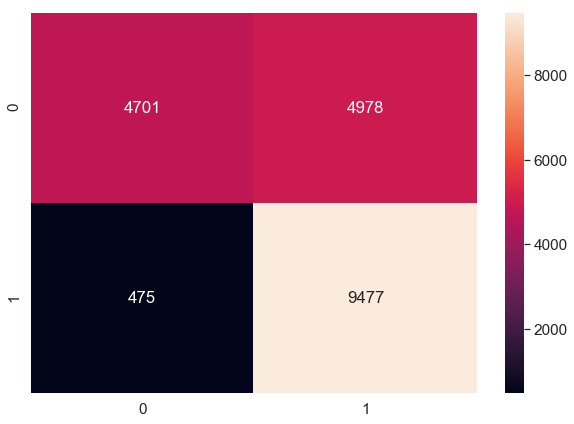

In [252]:
cm = confusion_matrix(y_test, predictions1)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, predictions1)))

In [253]:
# Predicting Test Set
acc = accuracy_score(y_test, predictions1)
prec = precision_score(y_test, predictions1)
rec = recall_score(y_test, predictions1)
f1 = f1_score(y_test, predictions1)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [254]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.655443,0.656952,0.670418,0.663616
1,Decision Tree,0.722225,0.655621,0.952271,0.776580


In [255]:
y_prob16 = dtree1.predict_proba(X_test)[:,1]

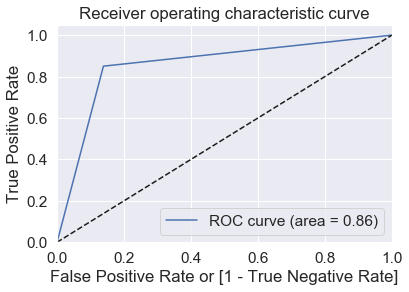

In [256]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_prob16,drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_prob16)
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

## Randomforest After oversampling

In [257]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 11,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

#

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=11, verbose=0, warm_start=False)

In [258]:
# Predicting Test Set
y_pred2 = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2)
rec = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

Test data accuracy: 0.9018


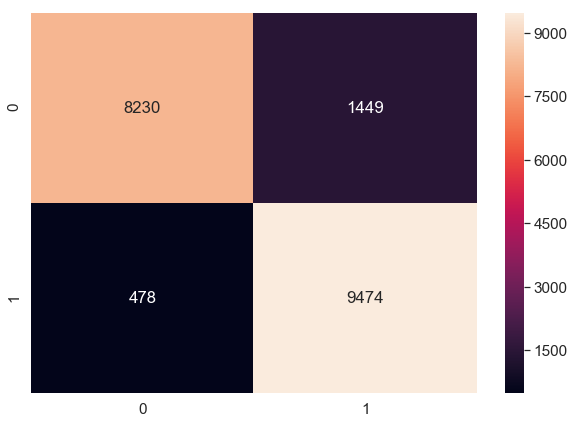

In [259]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, y_pred2)))

In [260]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      9679
           1       0.87      0.95      0.91      9952

   micro avg       0.90      0.90      0.90     19631
   macro avg       0.91      0.90      0.90     19631
weighted avg       0.91      0.90      0.90     19631



### The random forest model predicted 1 with 0.87 precision and 0 with 0.95 precision  which shows the overall precision rate is 99.1 which shows great improvement in the model.

In [261]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.655443,0.656952,0.670418,0.663616
1,Decision Tree,0.722225,0.655621,0.952271,0.776580
2,Random Forest,0.901839,0.867344,0.951969,0.907689


In [262]:
y_prob13 = classifier.predict_proba(X_test)[:,1]

In [263]:
y_prob13

array([0.8, 0. , 1. , ..., 1. , 0. , 0. ])

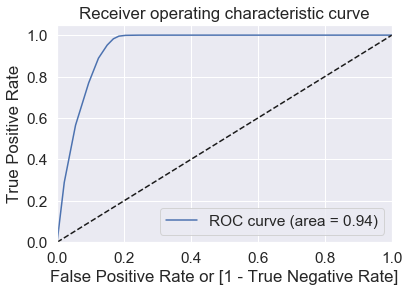

In [264]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_prob13,drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_prob13)
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

## Naive bayes

In [265]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [266]:
# Predicting Test Set
y_pred4 = model.predict(X_test)
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

In [267]:
model_results = pd.DataFrame([['Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

Test data accuracy: 0.6089


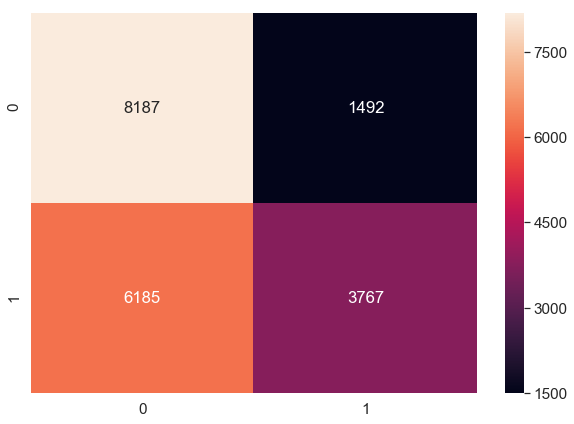

In [268]:
cm = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, y_pred4)))

In [269]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.57      0.85      0.68      9679
           1       0.72      0.38      0.50      9952

   micro avg       0.61      0.61      0.61     19631
   macro avg       0.64      0.61      0.59     19631
weighted avg       0.64      0.61      0.59     19631



In [270]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.655443,0.656952,0.670418,0.663616
1,Decision Tree,0.722225,0.655621,0.952271,0.776580
2,Random Forest,0.901839,0.867344,0.951969,0.907689
3,Naive Bayes,0.608935,0.716296,0.378517,0.495299


### This model predicted 1 with 0.72 precision and 0 with 0.57 precision which shows the overall precision rate is 0.64.

In [271]:
y_prob14 = model.predict_proba(X_test)[:,1]

In [272]:
y_prob14

array([0.30163848, 0.15243473, 0.26838698, ..., 0.3520888 , 0.22418064,
       0.33109499])

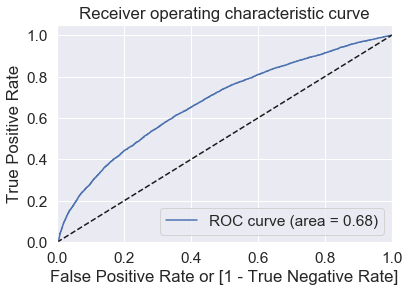

In [273]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_prob14,drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_test, y_prob14)
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

# Bagging

In [274]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

In [275]:
# Bagging

bg = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5, max_features=1.0, n_estimators=20)
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [276]:
bg.score(X_train, y_train)

0.9747833111368251

In [277]:
bg.score(X_test,y_test)

0.9058631755896287

In [278]:
bg_pred = bg.predict(X_test)

Test data accuracy: 0.9059


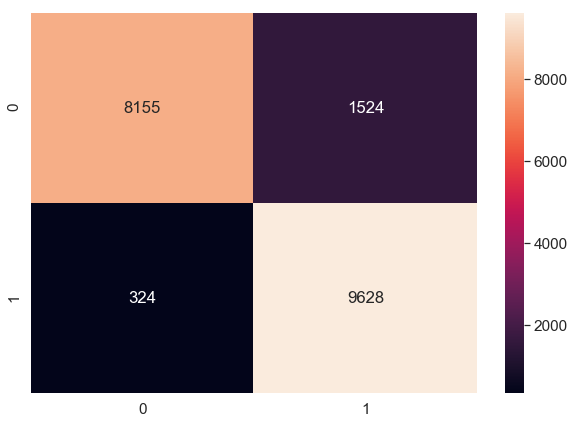

In [279]:
cm6 = confusion_matrix(y_test, bg_pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm6, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, bg_pred)))

In [280]:
# Predicting Test Set

acc = accuracy_score(y_test, bg_pred)
prec = precision_score(y_test, bg_pred)
rec = recall_score(y_test, bg_pred)
f1 = f1_score(y_test, bg_pred)
model_results = pd.DataFrame([['Bagging Classifier', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.655443,0.656952,0.670418,0.663616
1,Decision Tree,0.722225,0.655621,0.952271,0.776580
2,Random Forest,0.901839,0.867344,0.951969,0.907689
3,Naive Bayes,0.608935,0.716296,0.378517,0.495299
4,Bagging Classifier,0.905863,0.863343,0.967444,0.912434


# Boosting

In [281]:
#Boosting
ad = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=0.01)
ad.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=10, random_state=None)

In [282]:
ad.score(X_train, y_train)

1.0

In [283]:
ad.score(X_test,y_test)

0.8531404411390148

In [284]:
ad_pred = ad.predict(X_test)

In [285]:
print(classification_report(y_test,ad_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      9679
           1       0.86      0.85      0.85      9952

   micro avg       0.85      0.85      0.85     19631
   macro avg       0.85      0.85      0.85     19631
weighted avg       0.85      0.85      0.85     19631



Test data accuracy: 0.8531


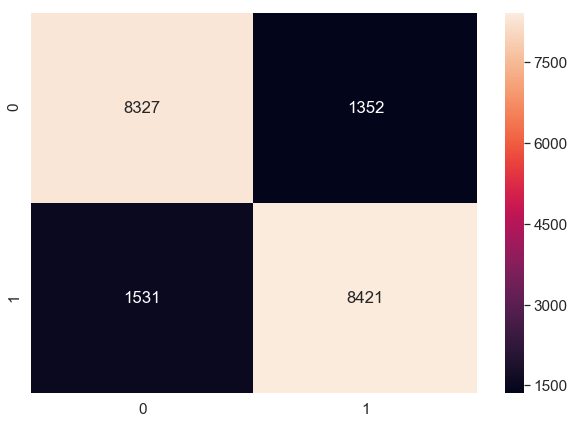

In [286]:
cm7 = confusion_matrix(y_test, ad_pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm7, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, ad_pred)))

In [287]:
acc = accuracy_score(y_test, ad_pred)
prec = precision_score(y_test, ad_pred)
rec = recall_score(y_test, ad_pred)
f1 = f1_score(y_test, ad_pred)


In [288]:
model_results = pd.DataFrame([['Adaboost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.655443,0.656952,0.670418,0.663616
1,Decision Tree,0.722225,0.655621,0.952271,0.776580
2,Random Forest,0.901839,0.867344,0.951969,0.907689
3,Naive Bayes,0.608935,0.716296,0.378517,0.495299
4,Bagging Classifier,0.905863,0.863343,0.967444,0.912434
5,Adaboost,0.853140,0.861660,0.846162,0.853840


<b>Is boosting more vulnerable to overfitting than bagging?</b>
<p style="padding:5px">We need to understand that bagging decreases variance, while boosting decreases bias.

Also, to be noted that under-fitting means that the model has low variance and high bias and vice versa for overfitting.

So, boosting is more vulnerable to overfitting than bagging.</p>

# Variable importance plot

##### Variable importance plot for random forest

Text(0.5, 0, 'Relative Importance')

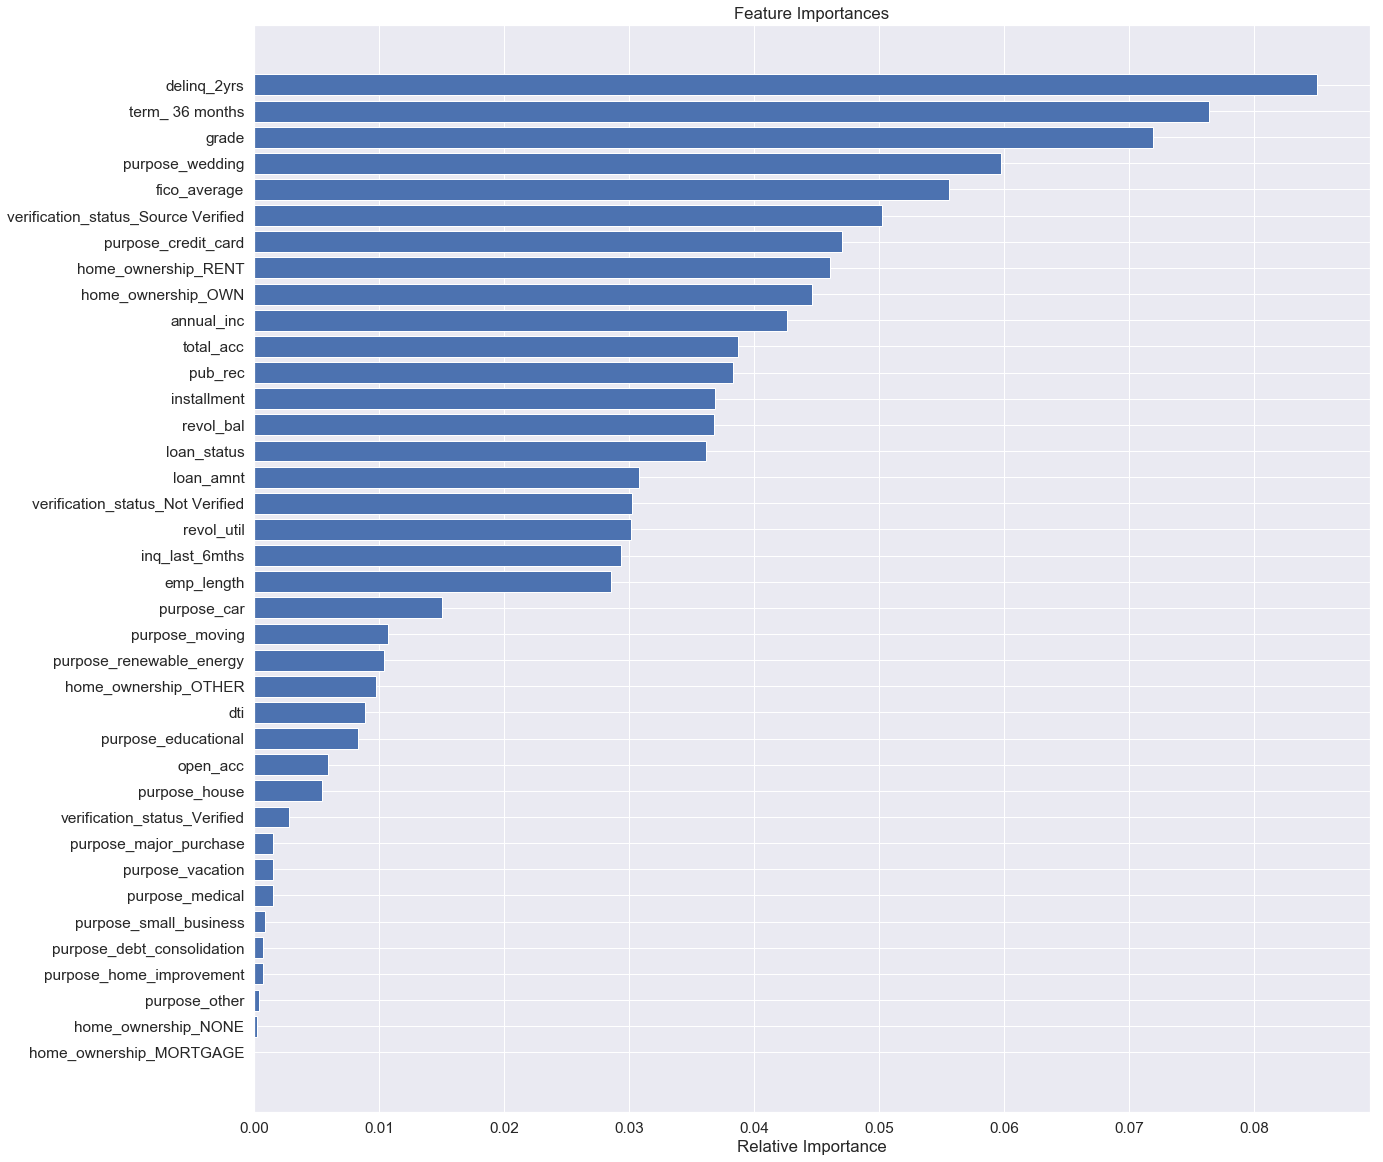

In [289]:
features=loan.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [290]:
varImp_df   = pd.DataFrame({'Feature_names' :features[indices],\
                            'Importances' : importances[indices]})
varImp_df.sort_values('Importances', ascending = False) 

,Feature_names,Importances
37,delinq_2yrs,0.085007
36,term_ 36 months,0.076363
35,grade,0.071894
34,purpose_wedding,0.059726
33,fico_average,0.055600
32,verification_status_Source Verified,0.050216
31,purpose_credit_card,0.047071
30,home_ownership_RENT,0.046036
29,home_ownership_OWN,0.044667
28,annual_inc,0.042605


##### variable importance for decision tree model

Text(0.5, 0, 'Relative Importance')

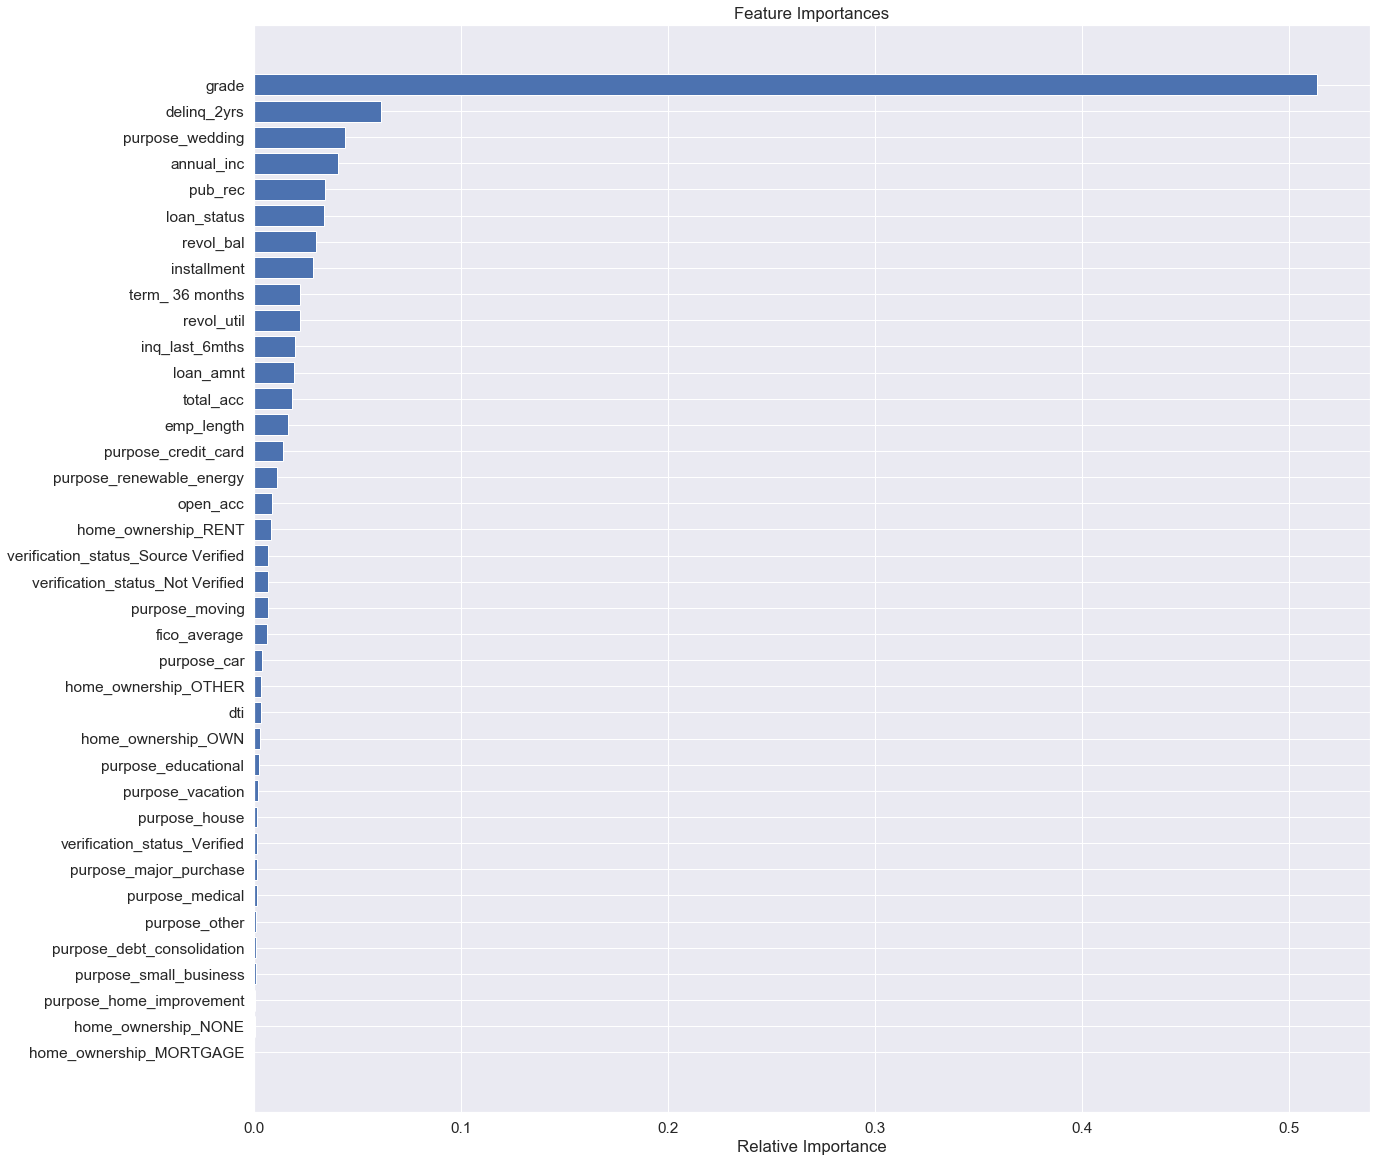

In [291]:
features=loan.columns
importances = dtree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [292]:
varImp_df1   = pd.DataFrame({'Feature_names' :features[indices],\
                            'Importances' : importances[indices]})
varImp_df1.sort_values('Importances', ascending = False) 

,Feature_names,Importances
37,grade,0.513249
36,delinq_2yrs,0.061304
35,purpose_wedding,0.043893
34,annual_inc,0.040635
33,pub_rec,0.034386
32,loan_status,0.034011
31,revol_bal,0.029834
30,installment,0.028606
29,term_ 36 months,0.022395
28,revol_util,0.022246
